<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC마켓에서 이번에는 lucky bag을 패션 분야에 접목을 시키려고 하는데
패션 분야이기 때문에 상품 개수가 늘어나고 어종이 아닌 일반 잡화용으로 제공하기로 했다


In [1]:
# 인공 신경망 - deep learning의 시작

# MNIST data set: 손으로 쓴 0 ~ 9의 숫자로 이루어져 있다
# MNIST data set for fashion - 숫자 대신 패션 아이템으로 이루어짐 있다
# 실행마다 동일한 결과를 얻기 위해 keras에 random seed 사용하고 tensorflow로 연산을 결정적으로 만든다

import tensorflow as tf
tf.keras.utils.set_random_seed(42) # keras 에 random seed 설정 방법
tf.config.experimental.enable_op_determinism() # pycharm이나 다른 곳에서 version오류 해결에 사용

from tensorflow import keras

# 훈련set와 test set 생성해서 반환
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 생성된 자료는 content\sample_data에 train과 test file 생성됨

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)
# training set - 훈련 set: 6만개, 28 * 28 image / test set: 6만개
# -> 해상도 28 * 28

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)
# test set - 훈련 set: 만개, 28 * 28 image / test set: 만개

(10000, 28, 28) (10000,)


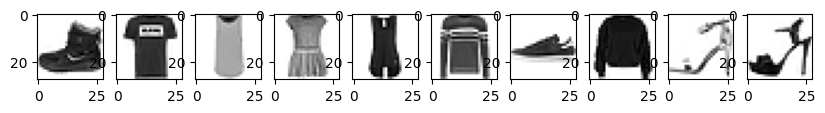

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('on')
plt.show()

In [5]:
print([train_target[i] for i in range(10)]) # sample의 target확인 - 0 ~ 9
# 답(0 ~ 9 순서대로):
# 티셔츠, 바지, 스웨터, 드레스, 코트, 샌달, 셔츠, 스니커즈, 가방, 앵클부츠츠

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))
# 10개항목 6천개씩 다 있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [7]:
# logistic 회귀로 패션 아이템 분류하기

# 전체를 한번에 훈련하려 하지 말고 하나씩 꺼내서 훈련해보자
# 확률적 경사 하강법(SGDClassifier - 분류용)을 사용할 때 표준화 전처리된 data 사용
# 확률적 경사하강법은 여러 특성 중 기울기가 가파은 방향을 따라 이동
# 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실함수의 경사를 내려올 수 없다
# 패션 MNIST의 경우 흑백이기때문에 0~255 사이의 정수 값을 가진다
# -> 255로 나누어 0~1 사이 값으로 정규화 진행 (양수 값으로 이루어진 이미지 전처리용)

# reshape로 2차원 배열을 1차원으로
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
print(train_scaled.shape)


(60000, 784)


In [8]:
from sklearn.model_selection import cross_validate # 교차검증
from sklearn.linear_model import SGDClassifier # 경사하강법

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42) # 5번 반복해서 교차검증 시행
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


In [9]:
# logistic 회귀 공식
# z = a * (제 1항) + b * (제 2항) + ... + x * (n항) + y -> 특성이 n개 있을때

# 티셔츠 선형 방정식
# z_티셔츠 = a * (pixel 1) + b * (pixel 2) + c * (pixel 3) + ... + x * (pixel 784) + y(절편)
# 바지 선형 방정식 - 티셔츠와 다른 값을 사용해야 한다! 나머지 class에 대한 선형 방정식도 동일
# z_바지 = a' * (pixel 1) + b' * (pixel 2) + c' * (pixel 3) + ... + x' * (pixel 784) + y'(절편)
# 그 뒤 softmax 함수를 통과해서 각 class 에 대한 확률을 얻을 수 있다

In [10]:
# 인공신경망(artificial nural network; ANN)을 사용해서 분류 문제의 성능을 높이자
# https://todayisbetterthanyesterday.tistory.com/41
# https://todayisbetterthanyesterday.tistory.com/42

# z_티셔츠 ~ class 10개인 z_10까지 계산하고 이를 바탕으로 class를 예측하기 때문에
# 신경망 최종 값은 출력 층

# 인공 신경망의 z값 계산하는 단위는 Neuron이라고 부른다 -> 선형계산 진행(대부분unit이라고 부른다)

# 1 ~ 784번 pixel까지를 입력층이라고(input layer) 부른다

# z_1을 만들기 위해서 pixel1인 x_1에 곱해지는 가중치는 w_1.1 ... 10개의 neuron
# 사람 뇌에 있는 neuron과 다르게 뭔가를 만드는 게아니라 알고리즘의 일종이다
# 확률적 경사 하강법 - 가장 간단한 인공 신경망 model
# 확률적 경사 하강법을 사용한 logistic 회귀model이 가장 간단한 인공 신경망이라면 인공 신경망을 만드들어도 성능이 좋아지지는 않는다

In [11]:
# Tensor Flow
# deep learning library에서 인기가 높다
# Google이 2015년 11월 Open Source로 공개한 deep learning library (과거 alphago)
# Tensor Flow 2.x version이 2019년 9월에 released
import tensorflow as tf # pycharm에 설치되있지 않기 때문에 그곳에서는 설치 필수
from tensorflow import keras # 고수준 api

# deep learning library는 GPU를 사용해서 인공 신경망을 훈련한다(GPU는 vector와 행렬 연산으로 3d연산에 최적화되어있다)
# 곱셈과 덧셈이 많이 수행되는 인공 신경망에 속도를 높여 준다
# keras library 직접 GPU연산을 수행하지 않는다
# 대신 GPU 연산을 수행하는 다른 library를 backend로 사용
# Tensor Flow가 kerasbackend로 사용가능 - multi backend keras
# keras api만 익히면 다양한 deep learninglibrary를 사용할 수 있다

In [12]:
# ANN으로 model 만들기 - 앞에 사용했던 fashion set 6만개 사용
# ANN에서는 교차 검증을 사용하지 않고 검증 set를 별도로 덜어내서 사용
# - deep learning 분야의 dataset은 충분히 크기 때문에 검증 점수가 안정적
# - 교차검증을 수행하기에는 훈련 시간이 너무 오래 걸린다(fit 시간만 몇시간, 최악의 경우 며칠이 걸릴수도)

from sklearn.model_selection import train_test_split

# 훈련 set, 검증(val) set 생성(20%)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [14]:
# deep learning에서는 다양한 종류의 층을 추가하는 식으로 model 생성
# Dense 층, 밀집 층, 완전 연결 층, fully conntected layer이라고 한다

# 10개의 unit, 다중분류이므로 활성화 함수는 softmax, 입력 값은 784개의 원소로 이루어진 1차원 배열
# (이중분류라면 sigmoid함수 사용)

# keras는 첫번째 층에 입력 크기를 넣어야 하고, 그 다음에 추가되는 층은 자동으로 계산되기 때문에 넣을 필요 X
# keras model은 Sequesntial class로 만든다

# 인공 신경망의 오른쪽에 놓은 층을 만들고
# 10개의 패션 item을 분류하기 위해 10개의 뉴런으로 구성
# keras의 layer 패키지 안에는 다양한 층이 존재,
# 가장 기본이 되는 층이 밀집층(dense layer)
# 여기서 Dense Layer는 784개의 pixel과 10개의 neurun이 모두 연결된 선이라는 의미이며 현재 7,840개의 선이 있다
# - 이런 층을 모두 연결하고 있어서 완전 연결층(fully connected layer)이라고 한다

In [15]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # Dense(neuron 개수, neuron에 적용할 함수, 입력 크기)
# activatin = 'softmax' - 출력되는 값을 확률로 바꾸기(다중분류니까)
# activatin = 'sigmoid' - 이진 분류
# 입력의 크기는 10개의 neuron이 각각 몇개의 입력을 받는지 tuple로 지정한다

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 밀집층을 가진 신경망 model을 만들자
model = keras.Sequential([dense])
# 밀집층을 가진 신경망 model을 만들어서 Sequential class를 사용한다
# Sequential class의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달한다
# 여기서 만든 model 객체가 바로 신경망 model

In [34]:
# softmax와 같이 neuron의 선형 방정식 계산 결과에 적용되는 함수를 활성화 함수(activation function)라고 한다

# 인공신경망으로 패션 아이템 분류하기

# keras model 훈련 전 설정단계부터
# model 객체의 compile() method  실행
# 손실함수 loss='sparse_categorical_crossentropy' (희소 다중분류 손실 함수) -> 정수 target
#               'sparse_binary_crossentropy (희소 이진분류 손실 함수) -> 이진 target
# 측정 값 = metrics=['accuracy'] -> 정확도의 지표가 된다
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# keras는 자동으로 epoch마다 손실을 기록한다 (추가 정확도를 기록하기 위해 metrics)

In [35]:
print(train_target[:10]) # 정수형으로 target이 생성되어 있다 -> one-hot encording

[7 3 5 8 6 9 3 3 9 9]


In [37]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8552 - loss: 0.4277
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8570 - loss: 0.4232
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8579 - loss: 0.4197
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8592 - loss: 0.4169
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8597 - loss: 0.4145


In [39]:
# 각 epoch마다 걸린시간, 정확도(accuracy; 점수), 손실(loss)
# 최종 훈련 점수 - 85.97%

# keras model의 성능 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.4334


[0.4413740336894989, 0.8489999771118164]

In [ ]:
# sklearn과 keras model 비교

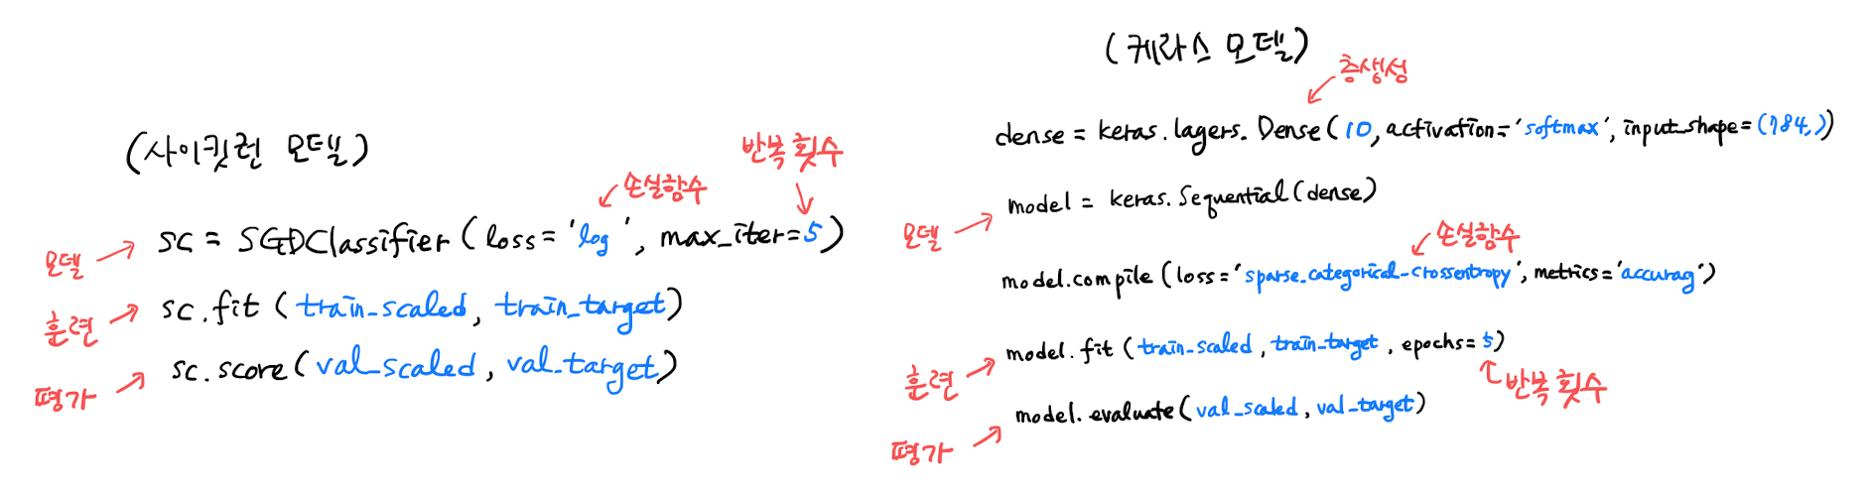